# Exercise 12: Linear Advection

After implementing different schemes for diffusion in the last exercise, we are now only a small step away from solving the entire transport equation. Recall that the entire equation is:

$$\frac{\partial u}{\partial t} + \nabla \cdot \left(\vec{v} u\right) - \nabla \cdot \left( \kappa \nabla u \right) + S = 0$$

Today, we are going to implement steps to solve the advective term in a transient simulation. To get started, we will now only consider the 1-D case of (incompressible) linear advection as:

$$\frac{\partial u}{\partial t} + v_x \frac{\partial u}{\partial x} = 0$$

The main difference to the previous examples of diffusion is that, now, we only have first derivatives to solve. Let's recall the standard finite difference schemes to discretise first-order derivatives at a location $i$:

Forward difference:

$$\left(\frac{\partial u}{\partial x}\right)_i = \frac{u_{i+1} - u_i}{\Delta x} + \mathcal{O}(\Delta x)$$

Backward difference:

$$\left(\frac{\partial u}{\partial x}\right)_i = \frac{u_{i} - u_{i-1}}{\Delta x} + \mathcal{O}(\Delta x)$$


Central difference:

$$\left(\frac{\partial u}{\partial x}\right)_i = \frac{u_{i+1} - u_{i-1}}{2 \Delta x} + \mathcal{O}(\Delta x^2)$$

As the central difference scheme is more accurate than the one-sided difference schemes, it is usually the first choice in FD discretisations of first derivatives. So, let's implement it here!



In [1]:
#from IPython.core.display import HTML
#css_file = 'nre2_style.css'
#HTML(open(css_file, "r").read())

In [2]:
from __future__ import division

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
plt.rcParams['figure.figsize'] = [10., 7.]
plt.rcParams['font.size'] = 16

In [4]:
%matplotlib inline

As in the case of diffusion, we now also have the choice to define the point in our time interval where we estimate the spatial gradient. We will first start with an explicit implementation, as this is the straight-forward way to solve the problem.

We are implementing the standard "Forward-Time-Central-Space" (FTCS) scheme:

$$\frac{u_i^{k+1} - u_i^k}{\Delta t} = v \frac{u_{i+1} - u_{i-1}}{2 \Delta x}$$

If we sort this equation to have unknown terms (at time $k+1$) on the left, and known terms (at time $k$) on the right as before, we obtain a nice explicit equation:

$$u_i^{k+1} = u_i^k - \frac{1}{2} \frac{v \Delta t}{\Delta x} (u_{i+1}^k - u_{i-1}^k)$$ 

Or, using the definition for the Courant number $Cr = \frac{v \Delta t}{\Delta x}$:

$$u_i^{k+1} = u_i^k - \frac{1}{2} Cr (u_{i+1}^k - u_{i-1}^k)$$ 

With all your knowledge of Python, it will be very easy for you to implement this equation in a function to solve a linear advection problem.

As initial condition, we will use gaussian peak as before:

In [5]:
# define model dimension
L = 100
nx = 100
dx = L/nx
x = np.arange(dx/2., L+dx/2., dx)
u_init = 1 * np.exp(-((np.linspace(0,1,nx)-0.3) / 0.1)**2)

(-0.1, 1.1)

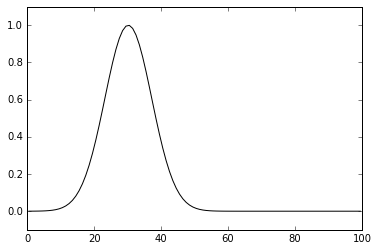

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, u_init, 'k-', lw=1)
ax.set_ylim([-0.1,1.1])

We would like to know how this "peak" of $u$ is advancing over time in a fluid field with velocity $v = 2.0$. Let's say that we would like to determine the total movement for a time $T = 20$. 

In fact, you surely realise that you don't need a numerical method to solve this problem and that we can directly obtain the analytical solution.

**Your task**: calculate the advected peak and create a plot with initial and advected peak:

In [7]:
# your code here:


## Numerical solution

So, let's now implement the FTCS solution for this problem. We now need to decide on an additional aspect: the number of time steps (or, respectively, the time step size).

As a start, let's take 40 time steps: $n_t = 40$.

**Your task**: Write a function to solve this problem numerically

Suggestion: write a separate function to solve one time step with the FTCS method so that you can exchange it later (you might remember why from the lecture):

In [8]:
# your code here
def ftcs(u, v, dt, dx):
    """Advance one time step with FTCS scheme"""

    

In [9]:
# define additional parameter and perform iteration over time:

nt = 



SyntaxError: invalid syntax (<ipython-input-9-4a96c140d11f>, line 3)

Create a plot of the result and compare it to the analytical solution:

I hope that the result looks different to what you expected from the first consideration of the problem, above!

Of course, after following the lecture you will know what happened here: the FTCS scheme is, unfortunately, *unconditionally unstable*! So, whatever we do, we will not get a reasonable result!

To solve this problem with a first-order finite difference scheme, we therefore have to revert to the one-sided differences and live with the fact that we only get first-order accuracy.

When considering these schemes, we have two choices now: forward difference and backward difference. Which one is the logical one to use in this case? How do you make this choice - and why?

**Your task**: write a function that always chooses the right one-sided difference scheme and then performs one iteration in time:

In [3]:
# your code here
def upwind(u, v, dt, dx):
    """Advance one time step with upwind scheme"""
    

In [4]:
# Perform simulations with the upwind scheme


Create a plot of the results:

What happened?

## Implicit solutions

We talked about the Courant criterion and the famous Courant-Friedrichs-Levy (CFL) condition in the lecture. We encountered a similar condition before: in the case of the diffusion equation, we had to consider a criterion, as well (**Question: what was it?**). 

We could resolve a similar issue for the diffusion equation by using an implicit approach. Let's try the same thing here.

We will implement a Crank-Nicolson scheme with equal weighting between beginning ($k$) and end ($k+1$) of the time step to determine the spatial gradient. Writing down the equation and putting $k+1$ terms on the left, and $k$ terms on the right, as before, we obtain:

$$-\frac{1}{4} Cr u_{i-1}^{k+1} + u_i^{k+1} + \frac{1}{4} Cr u_{i+1}^{k+1} = 
\frac{1}{4} Cr u_{i-1}^k + u_i^k - \frac{1}{4} Cr u_{i+1}^k$$

Where $Cr$ is the Courant number. This scheme is, in fact, unconditionally stable and second order accurate.

**Your task**: use a C-N method to solve the advection problem.


In [5]:
# Your code:



## Further ideas

We also talked about other ways to increase accuracy in explicit schemes in the lecture, specifically:

- the "Leapfrog" scheme
- the "Lax-Wendroff" scheme
- Use a C-N scheme, but with a higher-order approximation in space

Implement one of those schemes and compare the accuracy to the simple upwind scheme above.